<a href="https://colab.research.google.com/github/Harishvishwa07/Health_Insurance_Premium_Prediction/blob/main/Health_Insurance_Premium_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
data.shape

(1338, 7)

In [ ]:
print('Total no of rows:', data.shape[0])
print('Total no of columns:', data.shape[1])

Total no of rows: 1338
Total no of columns: 7


In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
data['sex'] = data['sex'].map({'female':0, 'male':1})
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [ ]:
data['smoker'] = data['smoker'].map({'yes':1, 'no':0})
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [ ]:
data['region'] = data['region'].map({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4 })
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


Store features in Matrix X and vector y

In [ ]:
X = data.drop(['charges'], axis=1)
y = data['charges']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Importing the Models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

Training the model

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

svm = SVR()
svm.fit(X_train, y_train)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)

GradientBoostingRegressor()

Predict on Test data


In [ ]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'lr': y_pred1, 'svm': y_pred2, 'rf': y_pred3, 'gr': y_pred4})
df

,Actual,lr,svm,rf,gr
764,9095.06825,8924.407244,9548.261584,10921.731248,11001.128629
887,5272.17580,7116.295018,9492.515425,5473.887905,5840.174656
890,29330.98315,36909.013521,9648.758701,28312.371331,28001.980112
1293,9301.89355,9507.874691,9555.044136,9790.470395,9745.291602
259,33750.29180,27013.350008,9420.421978,34535.817766,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,47211.119422,45431.423211
575,12222.89830,11814.555568,9625.431547,12558.797377,12465.025294
535,6067.12675,7638.107736,9504.168517,6401.304588,6974.336525
543,63770.42801,40959.081722,9605.004594,46796.723702,47862.047791


Comapre the Performance visually


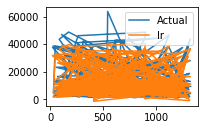

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(221)
plt.plot(df['Actual'], label='Actual')
plt.plot(df['lr'], label='lr')
plt.legend()

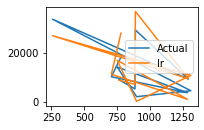

In [ ]:
#since the visualisation is messy and unclear, we select only the first 10 values
plt.subplot(221)
plt.plot(df['Actual'].iloc[0:11], label='Actual')
plt.plot(df['lr'].iloc[0:11], label='lr')
plt.legend()

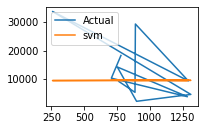

In [ ]:
plt.subplot(222)
plt.plot(df['Actual'].iloc[0:11], label='Actual')
plt.plot(df['svm'].iloc[0:11], label='svm')
plt.legend()

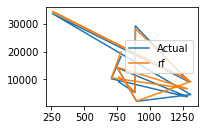

In [ ]:
plt.subplot(223)
plt.plot(df['Actual'].iloc[0:11], label='Actual')
plt.plot(df['rf'].iloc[0:11], label='rf')
plt.legend()

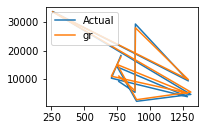

In [ ]:
plt.subplot(224)
plt.plot(df['Actual'].iloc[0:11], label='Actual')
plt.plot(df['gr'].iloc[0:11], label='gr')
plt.legend()

From the above visualizations, we can figure out that model 4 i.e., the gr model is pretty close to the actual values.

Evaluating the Algorithm

In [ ]:
from sklearn import metrics

score1 = metrics.r2_score(y_test, y_pred1)
score2 = metrics.r2_score(y_test, y_pred2)
score3 = metrics.r2_score(y_test, y_pred3)
score4 = metrics.r2_score(y_test, y_pred4)

print(score1, score2, score3, score4)

0.7833463107364539 -0.07229762787861826 0.8627930881575268 0.8779726251291786


yet again, it is indicating that the gr model is more accurate

In [ ]:
s1 = metrics.mean_absolute_error(y_test, y_pred1)
s2 = metrics.mean_absolute_error(y_test, y_pred2)
s3 = metrics.mean_absolute_error(y_test, y_pred3)
s4 = metrics.mean_absolute_error(y_test, y_pred4)

print(s1,s2,s3,s4)

4186.508898366434 8592.428727899724 2522.9673633047273 2447.9515580545844


Again, we can conclude that model 4 as the best suitable

**Predicting charges for New Customer**

In [ ]:
data = {'age':40,
        'sex':1,
        'bmi':40.40,
        'children':1,
        'smoker':1,
        'region':2}

df = pd.DataFrame(data, index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.4,1,1,2


In [ ]:
new_pred = gr.predict(df)
print(new_pred)

[41983.49491122]


**Save Model using Joblib**

In [ ]:
gr = GradientBoostingRegressor()
gr.fit(X,y)

GradientBoostingRegressor()

In [ ]:
import joblib

In [ ]:
joblib.dump(gr, 'model_joblib_gr')

['model_joblib_gr']

In [ ]:
model = joblib.load('model_joblib_gr')  #Now the model can be use any no of times as it is saved in joblib

In [ ]:
model.predict(df)  #(The value might sometimes be slightly different from the former as it ran across test data)

array([41983.49491122])